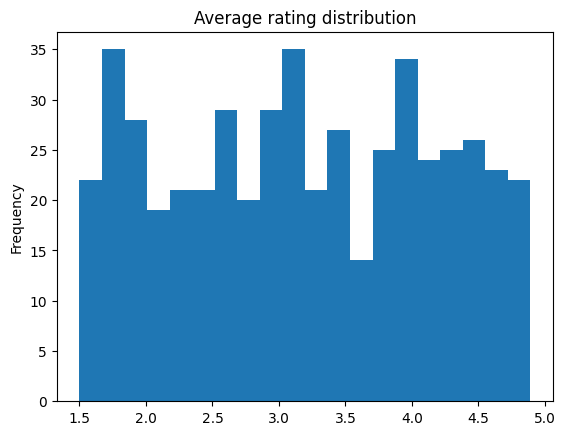

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('../books.json')
df['average_rating'].plot(kind='hist', bins=20, title='Average rating distribution')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load raw JSON data directly into a DataFrame
df = pd.read_json("../books_dirty.json")

# Set empty string to Nan instead of null
df.replace("", np.nan, inplace=True)

# Normalize year to numeric; invalid values -> NaN; use nullable integer type; clamp publication year between 1800 and 2026
df["publication_year"] = pd.to_numeric(df["publication_year"], errors="coerce").clip(1800, 2026).astype("Int64")

# Ensure average_rating, page_count, etc can’t have impossible values
# Clamp average rating between 0 to 5
df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce").clip(0, 5)
# Clamp page count between 1 and 10000
df["page_count"] = (pd.to_numeric(df["page_count"], errors="coerce").clip(1, 10000).astype("Int64"))
# Clamp price usd between 0 and 1000
df["price_usd"] = (pd.to_numeric(df["price_usd"], errors="coerce").clip(0, 1000))

# Normalize dates in ‘last_checkout’
df["last_checkout"] = pd.to_datetime(df["last_checkout"], format="mixed", errors="coerce")
df["last_checkout"] = df["last_checkout"].dt.strftime("%Y-%m-%d")

# Ensure genres, languages, formats, and publishers have proper capitalization
cols = ["genre", "language", "format", "publisher"]
for col in cols:
    df[col] = df[col].astype("string").str.strip().str.title()

# Find and remove duplicate books with same title and author
df.drop_duplicates(subset=["title", "author"], inplace=True)

# Drop rows if certain columns are empty
required = ["book_id", "title", "author", "publication_year", "page_count", "price_usd"]
df = df.dropna(subset=required)

# Show final cleaned dataframe
df

,book_id,title,author,genre,publication_year,page_count,average_rating,ratings_count,price_usd,publisher,language,format,in_print,sales_millions,last_checkout,available
5,585a53e3-d6d6-43e6-9ac0-029df6a3f863,Book Title 20,Author 27,Mystery,1987,756,NaN,2761,163.54,Old Tree Publishing,English,Audiobook,None,1.81,NaN,false
9,3f6e2304-c05e-4023-9fd2-97ae785e356e,Book Title 3,Author 6,Romance,1868,158,NaN,None,149.86,North Star Press,English,Ebook,True,Unknown,NaN,False
22,c5f54ced-09a9-478c-ab92-91c9787338bc,Book Title 6,Author 27,Mystery,1806,701,NaN,Unknown,1.07,<NA>,French,Paperback,false,Unknown,NaN,false
27,b143def7-5517-4a8c-bf24-de752ad4943f,Book Title 12,Author 19,Romance,1882,667,NaN,Unknown,141.92,North Star Press,German,Audiobook,true,-1.34,NaN,false
66,4cb44035-8cf1-4879-8b67-15cedc2b3868,Book Title 3,Author 26,History,1959,1,5.00,Unknown,175.15,<NA>,English,Hardcover,None,3.94,NaN,True
94,0be2e39e-1062-4efa-82e3-189fd59fe5fb,Book Title 16,Author 8,Mystery,1878,74,NaN,Unknown,53.58,<NA>,Eng,Ebook,false,None,NaN,None
102,05282799-a640-47a6-acef-c3b654aed1b3,Book Title 19,Author 4,Romance,1808,1,0.47,None,108.03,<NA>,English,Hardcover,True,5.03,NaN,true
110,dc7b1ff9-4dbb-4b3a-8e03-93d5d691d5a8,Book Title 13,Author 29,Science Fiction,2006,1,0.79,None,0.00,Old Tree Publishing,German,Audiobook,None,Unknown,NaN,True
130,55b9c9ab-260a-455a-8c96-def3a309e1f3,Book Title 16,Author 20,History,1800,777,0.57,Unknown,180.95,North Star Press,English,Hardcover,false,13.01,NaN,False
158,64242970-d191-450e-884c-1a3bbc1da57f,Book Title 2,Author 1,History,1800,1,NaN,Unknown,72.04,<NA>,Eng,Hardcover,True,Unknown,NaN,False


In [70]:
import pandas as pd
import numpy as np

# Load raw JSON data directly into a DataFrame
df = pd.read_json("../books_dirty.json")

# Set empty string to Nan instead of null
df.replace("", np.nan, inplace=True)

# Normalize year to numeric; invalid values -> NaN; use nullable integer type; clamp publication year between 1800 and 2026
df["publication_year"] = pd.to_numeric(df["publication_year"], errors="coerce").clip(1800, 2026).astype("Int64")

# Ensure average_rating, page_count, etc can’t have impossible values
# Clamp average rating between 0 to 5
df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce").clip(0, 5)
# Clamp page count between 1 and 10000
df["page_count"] = (pd.to_numeric(df["page_count"], errors="coerce").clip(1, 10000).astype("Int64"))
# Clamp price usd between 0 and 1000
df["price_usd"] = (pd.to_numeric(df["price_usd"], errors="coerce").clip(0, 1000))

# Normalize dates in ‘last_checkout’
df["last_checkout"] = pd.to_datetime(df["last_checkout"], format="mixed", errors="coerce")
df["last_checkout"] = df["last_checkout"].dt.strftime("%Y-%m-%d")

# Ensure genres, languages, formats, and publishers have proper capitalization
cols = ["genre", "language", "format", "publisher"]
for col in cols:
    df[col] = df[col].astype("string").str.strip().str.title()

# Find and remove duplicate books with same title and author
df.drop_duplicates(subset=["title", "author"], inplace=True)

# Drop rows with empty fields
df.dropna(inplace=True)

df

,book_id,title,author,genre,publication_year,page_count,average_rating,ratings_count,price_usd,publisher,language,format,in_print,sales_millions,last_checkout,available,publisher_email


In [14]:
import pandas as pd
import numpy as np

# Load raw JSON data directly into a DataFrame
df = pd.read_json("../books_dirty.json")


# Ensure all emails ends with ".com" by 
df["publisher_email"] = (df["publisher_email"].str.replace(r"\.[a-z]{2,}$", ".com", regex=True))

df

,book_id,title,author,genre,publication_year,page_count,average_rating,ratings_count,price_usd,publisher,language,format,in_print,sales_millions,last_checkout,available,publisher_email
0,4f16650d-e26c-4c28-85af-5896d4369a70,Book Title 17,Author 20,History,Unknown,-5,None,3110,None,Old Tree Publishing,French,Ebook,False,12.54,N/A,None,info@northstarpress.com
1,d22e5bf8-62c6-46ac-995b-d4e81ecefc85,Book Title 9,Author 3,Science Fiction,Unknown,N/A,None,Unknown,N/A,North Star Press,english,Paperback,None,None,,True,eu.galacticbooks.dept@galacticbooks91.core.com
2,c4c3afb1-78bd-4948-85ea-4cde4714c373,Book Title 9,Author 26,Romance,Unknown,547,N/A,None,None,North Star Press,English,Ebook,false,Unknown,NaN,False,hello@northstarpress.byte.com
3,65a1615e-f0f0-4fcf-9dce-225281014064,Book Title 6,Author 8,Technology,1853,None,2.05,None,71.08,Sunshine Media,German,Audio Book,True,-4.31,,False,alexgarcia@www.galacticbooksmedia.com
4,7b16b1b6-239f-4c96-92a7-aae7eb76582f,Book Title 7,Author 7,Romance,None,-5,N/A,None,None,Sunshine Media,German,Audiobook,True,15.33,N/A,True,team@news.oldtreepublishing.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6e6be489-b4b5-405f-a6ef-c8ad71237720,Book Title 5,Author 30,Fantasy,None,-5,3.81,469,None,Sunshine Media,German,Paperback,False,16.57,,False,eu.contact@sunshinemedia.com
496,a9f84b56-693e-47c4-8462-624ca496bf15,Book Title 10,Author 23,History,2009,N/A,1.8,None,180.16,North Star Press,German,Audio Book,False,Unknown,NaN,false,jp.ckhan@sunshinemedia.lumen.com
497,78f9de5e-aa3d-4c4b-9049-dbfd03ed7d1f,Book Title 3,Author 6,Fantasy,1956,N/A,N/A,Unknown,N/A,North Star Press,French,Hardcover,None,None,,false,paper84@oldtreepublishing.com
498,16d37e36-8be9-493c-bbde-26f240b21d40,Book Title 1,Author 22,Romance,Unknown,N/A,N/A,4856,None,Sunshine Media,English,Hardcover,false,None,NaN,True,info@news.sunshine94.alpha.com
